In [10]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [11]:
# leitura dos conjuntos de dados
df_kc_75 = pd.read_csv('dados/sintoniaKc75.csv')
df_kc_150 = pd.read_csv('dados/sintoniaKc150.csv')
df_kc_225 = pd.read_csv('dados/sintoniaKc225.csv')

In [12]:
# função para calcular Kp, Ki e Kd pelo método Ziegler-Nichols
def ziegler_nichols_closed_loop(Kc, Tu):
    Kp = 0.6 * Kc
    Ki = 2 * Kp / Tu
    Kd = Kp * Tu / 8
    return Kp, Ki, Kd

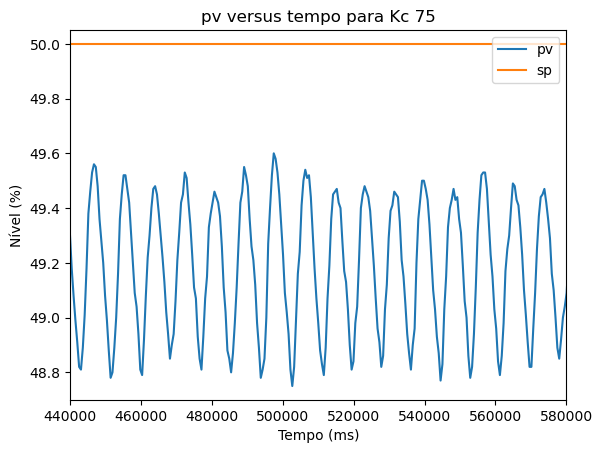

In [13]:
# gráfico relativo aos dados com Kp = 75
df_kc_75.plot(x='time', y=['pv', 'sp'], kind='line')
plt.xlim([440e3, 580e3])
plt.ylim([48.7, 50.05])
plt.title('pv versus tempo para Kc 75')
plt.xlabel('Tempo (ms)')
plt.ylabel('Nível (%)')
plt.legend(loc='upper right')
plt.show()

In [14]:
# cálculo de kp, ki e kd para kc = 75
df_kc_75['time_sec'] = df_kc_75['time'] / 1000
oscillation_points = df_kc_75[(df_kc_75['pv'].shift(1) < df_kc_75['pv']) & (df_kc_75['pv'].shift(-1) < df_kc_75['pv'])]
Tu = np.mean(np.diff(oscillation_points['time_sec']))
Kc = df_kc_75['kp'].iloc[0]
Kp, Ki, Kd = ziegler_nichols_closed_loop(Kc, Tu)
print(f"Valores calculados:\nKp: {Kp}\nKi: {Ki}\nKd: {Kd}\nPeríodo de oscilação Tu: {Tu}")

Valores calculados:
Kp: 45.0
Ki: 9.910023280689616
Kd: 51.08464285714284
Período de oscilação Tu: 9.081714285714282


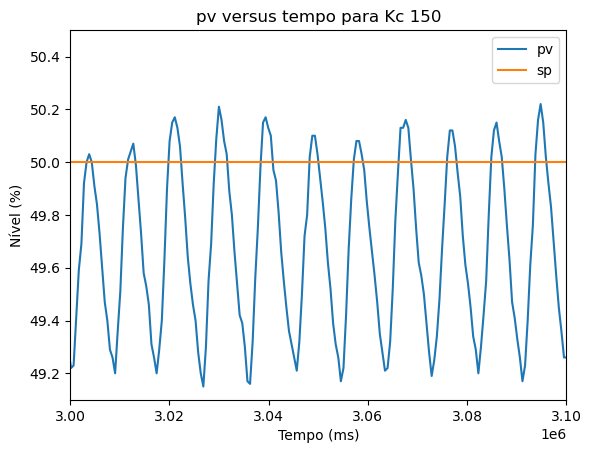

In [15]:
# gráfico relativo aos dados com Kp = 150
df_kc_150.plot(x='time', y=['pv', 'sp'], kind='line')
plt.xlim([3e6, 3.1e6])
plt.ylim([49.1, 50.5])
plt.title('pv versus tempo para Kc 150')
plt.xlabel('Tempo (ms)')
plt.ylabel('Nível (%)')
plt.legend(loc='upper right')
plt.show()

In [16]:
# cálculo de kp, ki e kd para kc = 150
df_kc_150['time_sec'] = df_kc_150['time'] / 1000
oscillation_points = df_kc_150[(df_kc_150['pv'].shift(1) < df_kc_150['pv']) & (df_kc_150['pv'].shift(-1) < df_kc_150['pv'])]
Tu = np.mean(np.diff(oscillation_points['time_sec']))
Kc = df_kc_150['kp'].iloc[0]
Kp, Ki, Kd = ziegler_nichols_closed_loop(Kc, Tu)
print(f"Valores calculados:\nKp: {Kp}\nKi: {Ki}\nKd: {Kd}\nPeríodo de oscilação Tu: {Tu}")

Valores calculados:
Kp: 90.0
Ki: 16.880727645195716
Kd: 119.95928389830509
Período de oscilação Tu: 10.663047457627119


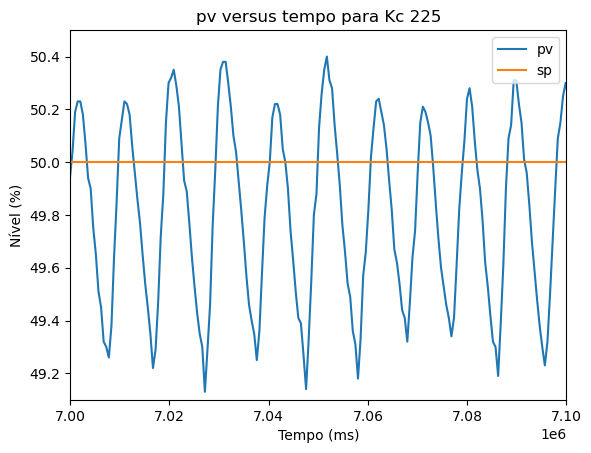

In [17]:
# gráfico relativo aos dados com Kp = 225
df_kc_225.plot(x='time', y=['pv', 'sp'], kind='line')
plt.xlim([7e6, 7.1e6])
plt.ylim([49.1, 50.5])
plt.title('pv versus tempo para Kc 225')
plt.xlabel('Tempo (ms)')
plt.ylabel('Nível (%)')
plt.legend(loc='upper right')
plt.show()

In [18]:
# cálculo de kp, ki e kd para kc = 225
df_kc_225['time_sec'] = df_kc_150['time'] / 1000
oscillation_points = df_kc_225[(df_kc_225['pv'].shift(1) < df_kc_225['pv']) & (df_kc_225['pv'].shift(-1) < df_kc_225['pv'])]
Tu = np.mean(np.diff(oscillation_points['time_sec']))
Kc = df_kc_225['kp'].iloc[0]
Kp, Ki, Kd = ziegler_nichols_closed_loop(Kc, Tu)
print(f"Valores calculados:\nKp: {Kp}\nKi: {Ki}\nKd: {Kd}\nPeríodo de oscilação Tu: {Tu}")

Valores calculados:
Kp: 135.0
Ki: 23.35854976121874
Kd: 195.05705818965518
Período de oscilação Tu: 11.558936781609196
